# Psycholinguistic classifier

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

from sklearn.ensemble import BaggingClassifier, BaggingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier, XGBRegressor

from ml_utils import print_roc, evaluate, best_threshold

from features import FeatureExtractor

from data import Data

In [2]:
psycholinguistics_path = 'utils/Psycholinguistic_Features.txt'
lm_books_path = '/Users/nathanhartmann/Downloads/model_books.lm'
lm_news_path = '/Users/nathanhartmann/Downloads/model_news.lm'
# lm_books_path = '/home/leabdro/Documentos/language_models/model_books.lm'
# lm_news_path = '//home/leabdro/Documentos/language_models/model_news.lm'
training_data = ['datasets/english/News_Train.tsv',
                 'datasets/english/WikiNews_Train.tsv',
                 'datasets/english/Wikipedia_Train.tsv',
                ]
dev_data = ['datasets/english/News_Dev.tsv',
            'datasets/english/WikiNews_Dev.tsv',
            'datasets/english/Wikipedia_Dev.tsv'
           ]

-----
# Features extraction

In [3]:
data_train = Data(training_data)
data_dev = Data(dev_data)

In [4]:
fe = FeatureExtractor(psycholinguistics_path, lm_books_path, lm_news_path)
x_train = fe.predict(data_train.instances)
y_train = data_train.y

x_dev = fe.predict(data_dev.instances)
y_dev = data_dev.y

In [5]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_dev = scaler.transform(x_dev)

-----
# Predicting

## LogisticRegression

--Optimazing f1--
Threshold: 0.35
--Scores--
Accuracy: 0.64
Precision: 0.82
Recall: 0.54
F1: 0.65
--Confusion matrix:--
 [[ 976  249]
 [ 964 1139]]


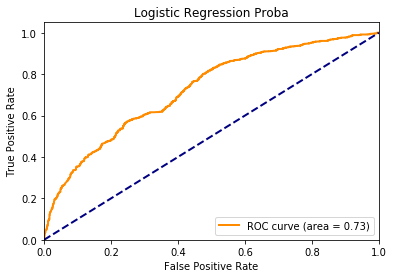

In [47]:
# model = LogisticRegression()
# param_grid = {
#   'C': [0.001,0.01,0.1,1,10,100,1000],
#  'penalty':['l1', 'l2']
# }
# grid_search_classifiers(model, param_grid)
model = LogisticRegression()
model.fit(x_train, y_train)
pred_train= model.predict_proba(x_train)[:, 1:]
pred_dev = model.predict_proba(x_dev)[:, 1:]
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='Logistic Regression Proba')

--Optimazing f1--
Threshold: 0.37
--Scores--
Accuracy: 0.63
Precision: 0.83
Recall: 0.54
F1: 0.65
--Confusion matrix:--
 [[ 948  230]
 [ 992 1158]]


/Users/nathanhartmann/Desktop/cwi-workshop/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


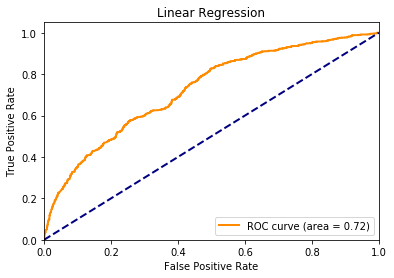

In [46]:
model = LinearRegression()
model.fit(x_train, y_train)
pred_train= model.predict(x_train)
pred_dev = model.predict(x_dev)
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='Linear Regression')

--Optimazing f1--
Threshold: 0.45
--Scores--
Accuracy: 0.81
Precision: 0.78
Recall: 0.76
F1: 0.77
--Confusion matrix:--
 [[1605  302]
 [ 335 1086]]


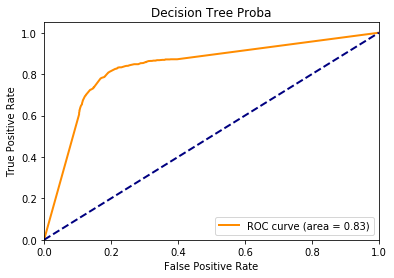

In [52]:
# tree = DecisionTreeClassifier(
#     min_samples_split=20,
#     max_depth=5,
#     min_samples_leaf=10,
#     criterion='gini')
# grid_search_regressors(tree, param_grid)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred_train= model.predict_proba(x_train)[:, 1:]
pred_dev = model.predict_proba(x_dev)[:, 1:]
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='Decision Tree Proba')

--Optimazing f1--
Threshold: 0.49
--Scores--
Accuracy: 0.69
Precision: 0.95
Recall: 0.58
F1: 0.72
--Confusion matrix:--
 [[ 986   64]
 [ 954 1324]]


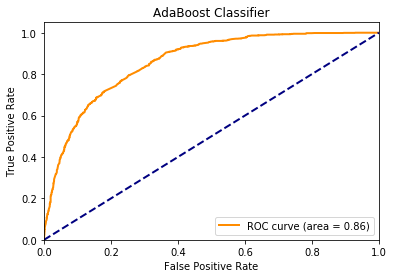

In [51]:
# ensemb = AdaBoostClassifier(
#     n_estimators=300,
#     learning_rate=0.001)
# grid_search_regressors(ensemb, param_grid)
model = AdaBoostClassifier()
model.fit(x_train, y_train)
pred_train= model.predict_proba(x_train)[:, 1:]
pred_dev = model.predict_proba(x_dev)[:, 1:]
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='AdaBoost Classifier')

--Optimazing f1--
Threshold: 0.44
--Scores--
Accuracy: 0.75
Precision: 0.86
Recall: 0.65
F1: 0.74
--Confusion matrix:--
 [[1293  201]
 [ 647 1187]]


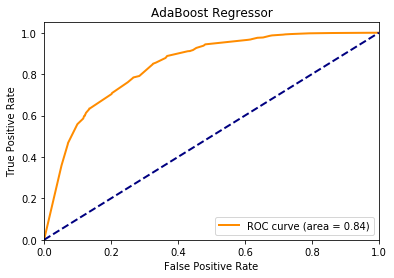

In [45]:
# model = AdaBoostRegressor()
# param_grid = {
#     'n_estimators':[10, 50, 100, 200, 300],
#     'learning_rate': [1, 0.1, 0.001, 0.0001],
#      'loss':['linear', 'square', 'exponential']}
# grid_search_regressors(model, param_grid)
model = AdaBoostRegressor()
model.fit(x_train, y_train)
pred_train= model.predict(x_train)
pred_dev = model.predict(x_dev)
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='AdaBoost Regressor')

--Optimazing f1--
Threshold: 0.51
--Scores--
Accuracy: 0.82
Precision: 0.79
Recall: 0.79
F1: 0.79
--Confusion matrix:--
 [[1641  296]
 [ 299 1092]]


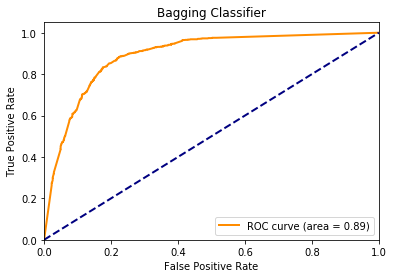

In [54]:
# model = BaggingClassifier()
# param_grid = {
#     'n_estimators':[10, 50, 100, 200, 300]}
# grid_search_regressors(model, param_grid)
model = BaggingClassifier()
model.fit(x_train, y_train)
pred_train= model.predict_proba(x_train)[:, 1:]
pred_dev = model.predict_proba(x_dev)[:, 1:]
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='Bagging Classifier')

--Optimazing f1--
Threshold: 0.51
--Scores--
Accuracy: 0.82
Precision: 0.77
Recall: 0.78
F1: 0.78
--Confusion matrix:--
 [[1643  317]
 [ 297 1071]]


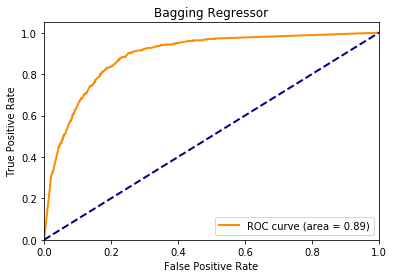

In [55]:
# model = BaggingRegressor()
# param_grid = {
#     'n_estimators':[10, 50, 100, 200, 300]}
# grid_search_regressors(model, param_grid)
model = BaggingRegressor()
model.fit(x_train, y_train)
pred_train= model.predict(x_train)
pred_dev = model.predict(x_dev)
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='Bagging Regressor')

--Optimazing f1--
Threshold: 0.45
--Scores--
Accuracy: 0.82
Precision: 0.82
Recall: 0.77
F1: 0.79
--Confusion matrix:--
 [[1592  244]
 [ 348 1144]]


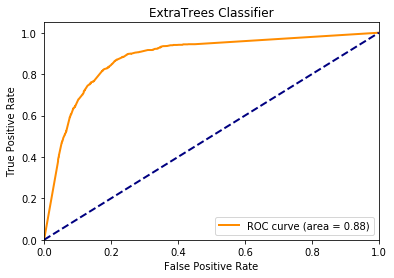

In [57]:
# model = tree = ExtraTreesClassifier()
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'min_samples_split': [2, 10, 20],
#     'max_depth': [None, 2, 5, 10],
#     'min_samples_leaf': [1, 5, 10],
#     'max_features':[None, 'sqrt', 'log2'],
#     'max_leaf_nodes': [None, 5, 10, 20]
# }
# grid_search_classifiers(model, param_grid)
model = ExtraTreesClassifier()
model.fit(x_train, y_train)
pred_train= model.predict_proba(x_train)[:, 1:]
pred_dev = model.predict_proba(x_dev)[:, 1:]
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='ExtraTrees Classifier')

--Optimazing f1--
Threshold: 0.45
--Scores--
Accuracy: 0.82
Precision: 0.83
Recall: 0.76
F1: 0.79
--Confusion matrix:--
 [[1586  240]
 [ 354 1148]]


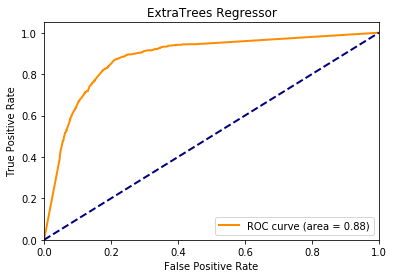

In [58]:
# model = ExtraTreesRegressor()
# param_grid = {
#     'criterion':['mse', 'mae'],
#     'min_samples_split': [2, 10, 20],
#     'max_depth': [None, 2, 5, 10],
#     'min_samples_leaf': [1, 5, 10],
#     'max_features':[None, 'sqrt', 'log2'],
#     'max_leaf_nodes': [None, 5, 10, 20]}
# grid_search_regressors(model, param_grid)
model = ExtraTreesRegressor()
model.fit(x_train, y_train)
pred_train= model.predict(x_train)
pred_dev = model.predict(x_dev)
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='ExtraTrees Regressor')

--Optimizing f1--
Threshold: 0.45
--Scores--
Accuracy: 0.82
Precision: 0.82
Recall: 0.77
F1: 0.79
--Confusion matrix:--
 [[1591  246]
 [ 349 1142]]


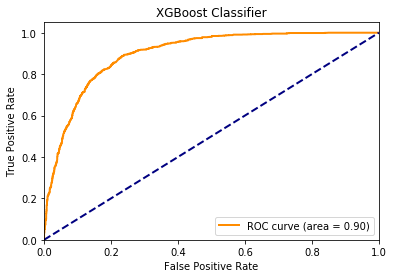

In [7]:
model = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1)
model.fit(x_train, y_train)
pred_train= model.predict_proba(x_train)[:, 1:]
pred_dev = model.predict_proba(x_dev)[:, 1:]
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='XGBoost Classifier')

--Optimazing f1--
Threshold: 0.41
--Scores--
Accuracy: 0.77
Precision: 0.85
Recall: 0.68
F1: 0.76
--Confusion matrix:--
 [[1391  211]
 [ 549 1177]]


/Users/nathanhartmann/Desktop/cwi-workshop/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


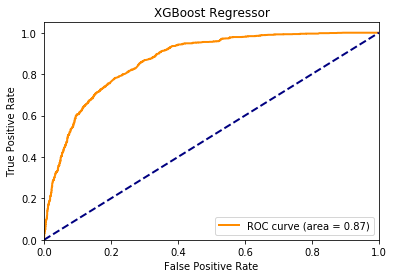

In [25]:
model = XGBRegressor()
model.fit(x_train, y_train)
pred_train= model.predict(x_train)
pred_dev = model.predict(x_dev)
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='XGBoost Regressor')

-----
# Tests

* target words not in psycholinguistic_features

In [110]:
# count = 0
# errors = []
# for instance in data_train.instances:
#     for target in instance.target:
#         try:
#             if len(df[df.Word == instance.tokens[target]].index) == 0:
#                 count += 1
#                 errors.append(instance.tokens[target])
#         except:
#             print(target, instance.target_chars, instance.tokens)
# print('%d / %d' % (count, len(data_train.instances)))
# print(list(set(errors)))

4014 / 27299
['', 'kabul', 'crackdown', 'goldenbridge', 'targeted', 'mla', 'amygdala', 'brevard', 'blek', 'teammate', 'jarvis', 'radars', 'cooperation', 'cernan', 'thumbs-up', 'stanković', 'gardner', 'luhman', 'bos', 'islamist', 'refinance', 'lockdown', 'tawam', 'kong', 'atropos', 'primetime', 'lt', 'bbc', 'dibenzenechromium', 'dvd', 'césar', 'organometallic', 'pompeii', 'asia', 'samsung', 'six-hour', 'nestmates', 'oriente', 'nasser', 'al-burnhanieh', 'london-based', 'iczn', 'perkasie', 'caspicara', 'maakond', 'itunes', 'pushkin', 'schengen', 'scm', 'brp', 'ibm', 'obamacare', 'moesian', 'pupates', 'kcvo', 'signings', 'premiered', 'kremlin-dominated', 'confusingly', 'choe', 'murad', 'karam', 'ex-soviet', 'primeiro', 'disabled/handicapped', 'fernando', 'worldwide', 'noorughli', 'doskozil', 'bosnia', 'mimar', 'eyewitnesses', 'kcb', 'timeline', 'psni', 'keita', 'rosenkavalier', '“', 'utc', 'hudson', 'gliese', 'favorites', 'shalygina', 'jaeg', 'six-point', 'thespis', 'temer', 'magherafelt',